# CAPÍTULO 4: Aprendizaje no supervisado

*Noemi González Lois*

**MÓDULOS**

In [1]:
# Importar los módulos necesarios
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score

# Ignorar advertencias de futuras versiones
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

CARGAMOS Y VISUALIZACIÓN DE LOS DATOS

Se carga el conjunto de entrenamiento y se elimina la variable 'Severity' asociada a la etiqueta, puesto que esta tarea es de aprendizaje no supervisado.

In [2]:
# Cargar el conjunto de datos
datos = pd.read_csv('SubconjuntoTraining.csv', delimiter=',')

# Eliminar la columna 'Severity' del conjunto de datos
data = datos.drop(['Severity'], axis='columns')

# Definir la lista de atributos
atributos = ['BI-RADS', 'Age', 'Shape', 'Margin', 'Density']

# Visualizar las primeras filas del conjunto de datos
data.head()

,BI-RADS,Age,Shape,Margin,Density
0,4,32,1,1,3
1,4,57,4,4,3
2,5,69,3,4,3
3,5,40,1,4,3
4,5,33,4,4,3


## PCA

**Estandarizamos** los datos: 

In [3]:
# Estandarizar los datos
data_standardized = StandardScaler().fit_transform(data)

# Crear un DataFrame con los datos estandarizados y los nombres de atributos originales
data_standardized = pd.DataFrame(data_standardized, columns=atributos)

# Visualizar las primeras filas del DataFrame estandarizado
data_standardized.head()

,BI-RADS,Age,Shape,Margin,Density
0,-0.48548,-1.633465,-1.398190,-1.180555,0.200163
1,-0.48548,0.089183,1.055298,0.781926,0.200163
2,1.10111,0.916054,0.237469,0.781926,0.200163
3,1.10111,-1.082218,-1.398190,0.781926,0.200163
4,1.10111,-1.564559,1.055298,0.781926,0.200163


MATRIZ DE COVARIANZA vs CORRELACIÓN

Las componentes principales pueden obtenerse a partir de la matriz de covarianza o de correlación. Vamos a calcular los autovalores y los autovectores con cada una de ellas: 

COVARIANZA

In [4]:
# Calcular la matriz de covarianza
covariance_matrix = np.cov(data_standardized.T)

# Calcular los autovalores y autovectores de la matriz de covarianza
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)

# Imprimir los autovalores
print('Los autovalores son:', eigenvalues, '\n')

# Imprimir los autovectores
print('Los autovectores son:\n', eigenvectors)

Los autovalores son: [2.41588933 0.26652494 0.99431865 0.62344191 0.70634408] 

Los autovectores son:
 [[ 0.45899029  0.02707574 -0.03164199  0.88655658 -0.04013771]
 [ 0.41351437  0.04836376  0.1745186  -0.24813857 -0.85710986]
 [ 0.54354681  0.68205216  0.06147582 -0.28216262  0.39492618]
 [ 0.55860045 -0.72833698  0.02016043 -0.25240221  0.30557727]
 [ 0.10419296  0.0354676  -0.98201646 -0.09550952 -0.12003119]]


CORRELACIÓN

In [5]:
# Calcular la matriz de correlación
correlation_matrix = np.corrcoef(data_standardized.T)

# Calcular los autovalores y autovectores de la matriz de correlación
eigenvalues, eigenvectors = np.linalg.eig(correlation_matrix)

# Imprimir los autovalores
print('Los autovalores son:', eigenvalues, '\n')

# Imprimir los autovectores
print('Los autovectores son:\n', eigenvectors)

Los autovalores son: [2.41274364 0.2661779  0.99302396 0.62263014 0.70542436] 

Los autovectores son:
 [[ 0.45899029  0.02707574 -0.03164199  0.88655658 -0.04013771]
 [ 0.41351437  0.04836376  0.1745186  -0.24813857 -0.85710986]
 [ 0.54354681  0.68205216  0.06147582 -0.28216262  0.39492618]
 [ 0.55860045 -0.72833698  0.02016043 -0.25240221  0.30557727]
 [ 0.10419296  0.0354676  -0.98201646 -0.09550952 -0.12003119]]


Si estandarizamos la matriz de covarianza, se obtiene la matriz de correlación. Esto se debe a que la correlación es una versión estandarizada de la covarianza.

Vamos a **ordenar** los autovalores y calcular la varianza explicada por cada uno:

In [6]:
# Lista con los pares de valores (autovalor, autovector)
pairs = [(np.abs(eigenvalues[i]), eigenvectors[:, i]) for i in range(len(eigenvalues))]

# Ordenar la lista de mayor a menor
pairs.sort(reverse=True)

# Imprimir los autovalores en orden descendente
print('Los autovalores en orden descendente son:')
for pair in pairs:
    print(pair[0].round(4))

Los autovalores en orden descendente son:
2.4127
0.993
0.7054
0.6226
0.2662


In [7]:
# Calcular la suma total de los autovalores
total_sum = sum(eigenvalues)

print('La varianza que explica cada componente es: \n')

# Lista para almacenar la varianza explicada por cada componente
explained_variance_ratio = []

# Iterar sobre los pares de autovalores y autovectores
for pair in pairs:
    # Calcular la varianza explicada por cada componente
    explained_variance = pair[0] / total_sum
    explained_variance_ratio.append(explained_variance)
    print(round(explained_variance, 5))

La varianza que explica cada componente es: 

0.48255
0.1986
0.14108
0.12453
0.05324


Los autovectores asociados a autovalores con más varianza explicada son los mejores para construir el nuevo espacio.

El **módulo de sklearn para PCA** utiliza la matriz de covarianza, por lo que vamos a representar las gráficas del scatter plot utilizando éste. Además, los autovalores calculados de forma manual coinciden con los que da como resultado este paquete. 

In [8]:
# Inicializar y ajustar el objeto PCA
pca = PCA()
datos_PCA = pca.fit_transform(data_standardized)

# Crear un DataFrame para los datos transformados por PCA
df = pd.DataFrame(datos_PCA)

Graficamos el scatter plot de las **2 primeras y las 2 últimas** componentes principales:


 La varianza explicada con las 2 primeras componentes es 68.12 %


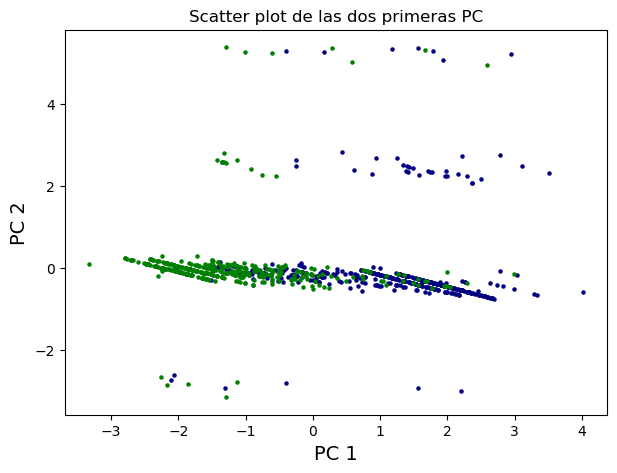


 La varianza explicada con las 2 últimas componentes es 17.78 %


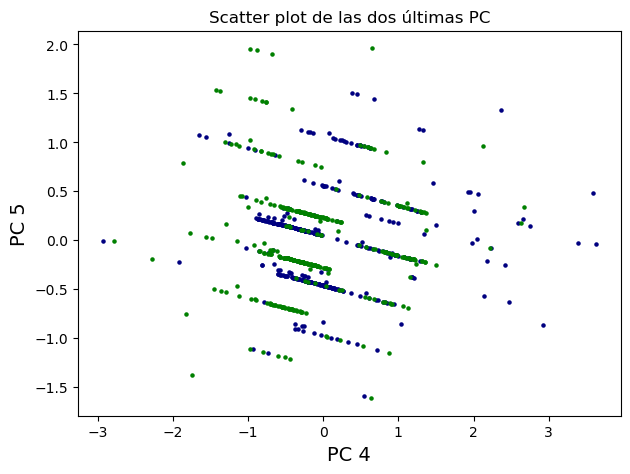

In [9]:
# Lista con la varianza que explica cada componente
var_exp = pca.explained_variance_ratio_

# DOS PRIMERAS COMPONENTES
var_exp_2 = sum(var_exp[:2]).round(4) * 100
print('\n La varianza explicada con las 2 primeras componentes es', var_exp_2, '%')

# Obtener las coordenadas de las dos primeras componentes principales
ejeX_2 = datos_PCA[:, 0]  # PC 1
ejeY_2 = datos_PCA[:, 1]  # PC 2


labels = datos['Severity']

# Scatter plot de las dos primeras PC
fig, ax = plt.subplots(figsize=(7, 5))
for label, color in [(0, 'navy'), (1, 'green')]:
    ax.scatter(ejeX_2[np.where(labels == label)], ejeY_2[np.where(labels == label)], c=color, s=20, marker='.')

plt.title('Scatter plot de las dos primeras PC')
plt.xlabel("PC 1", fontsize=14)
plt.ylabel("PC 2", fontsize=14)
plt.show()

# DOS ÚLTIMAS COMPONENTES
var_exp_last_2 = sum(var_exp[-2:]).round(4) * 100
print('\n La varianza explicada con las 2 últimas componentes es', var_exp_last_2, '%')

# Obtener las coordenadas de las dos últimas componentes principales
ejeX_last_2 = datos_PCA[:, -2]  # PC 4
ejeY_last_2 = datos_PCA[:, -1]  # PC 5

# Scatter plot de las dos últimas PC
fig, ax = plt.subplots(figsize=(7, 5))
for label, color in [(0, 'navy'), (1, 'green')]:
    ax.scatter(ejeX_last_2[np.where(labels == label)], ejeY_last_2[np.where(labels == label)], c=color, s=20, marker='.')

plt.title('Scatter plot de las dos últimas PC')
plt.xlabel("PC 4", fontsize=14)
plt.ylabel("PC 5", fontsize=14)
plt.show()


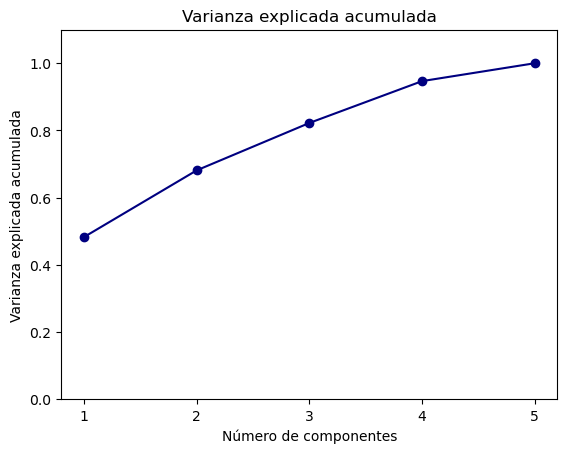


La varianza explicada con las 4 primeras componentes es 94.68 %


In [10]:
# Definir la lista de componentes para el eje X
componentes = range(1, len(pca.explained_variance_ratio_) + 1)

# Graficar la varianza explicada acumulada con valores enteros en el eje X
plt.plot(componentes, np.cumsum(pca.explained_variance_ratio_), color='navy', marker='o')
plt.ylim(0, 1.1)
plt.xticks(range(1, len(componentes) + 1))  # Establecer ticks en valores enteros
plt.title('Varianza explicada acumulada')
plt.xlabel('Número de componentes')
plt.ylabel('Varianza explicada acumulada')
plt.show()

# Calcular la varianza explicada con las 4 primeras componentes
var_exp_4 = sum(pca.explained_variance_ratio_[:4]).round(4) * 100
print('\nLa varianza explicada con las 4 primeras componentes es', var_exp_4.round(4), '%')

## ALGORITMO K-MEDIAS

VARIABLES ORIGINALES

Con **todas** las variables originales: 

In [11]:
X = np.array(data_standardized)
k_values = [2, 3, 4]

for k in k_values:
    # Inicializar y ajustar el modelo KMeans
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    
    # Calcular la puntuación de silueta media
    silhouette_avg = silhouette_score(X, labels)
    print("Para k =", k, ", el valor medio de la silueta es:", silhouette_avg.round(4))
    
    # No necesitamos calcular los valores de la silueta individual en este bucle

c:\Users\Noemi\anaconda3\envs\uni\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Para k = 2 , el valor medio de la silueta es: 0.3936


c:\Users\Noemi\anaconda3\envs\uni\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Para k = 3 , el valor medio de la silueta es: 0.416


c:\Users\Noemi\anaconda3\envs\uni\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Para k = 4 , el valor medio de la silueta es: 0.3632


Con las **dos mejores** variables originales:

In [12]:
# Seleccionar las columnas "Margin" y "Density"
X = data_standardized.iloc[:, 3:5].values

c:\Users\Noemi\anaconda3\envs\uni\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Para k= 2 , el valor medio de la silueta es: 0.6608


c:\Users\Noemi\anaconda3\envs\uni\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Para k= 3 , el valor medio de la silueta es: 0.7572


c:\Users\Noemi\anaconda3\envs\uni\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Para k= 4 , el valor medio de la silueta es: 0.7826


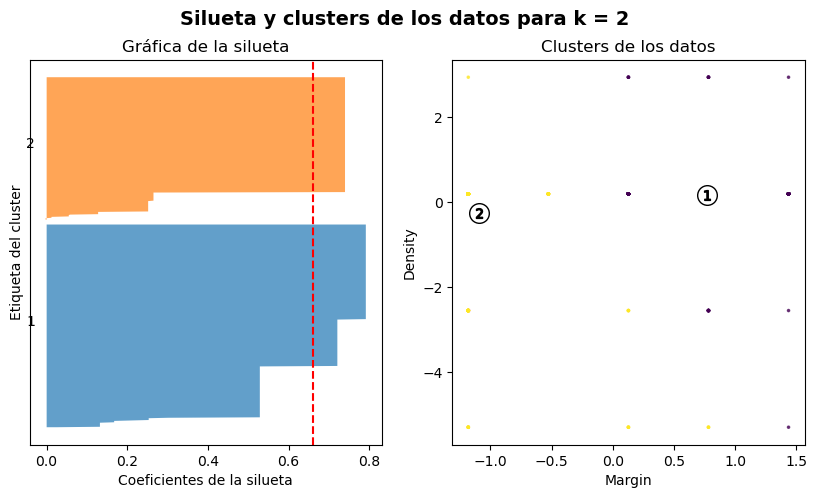

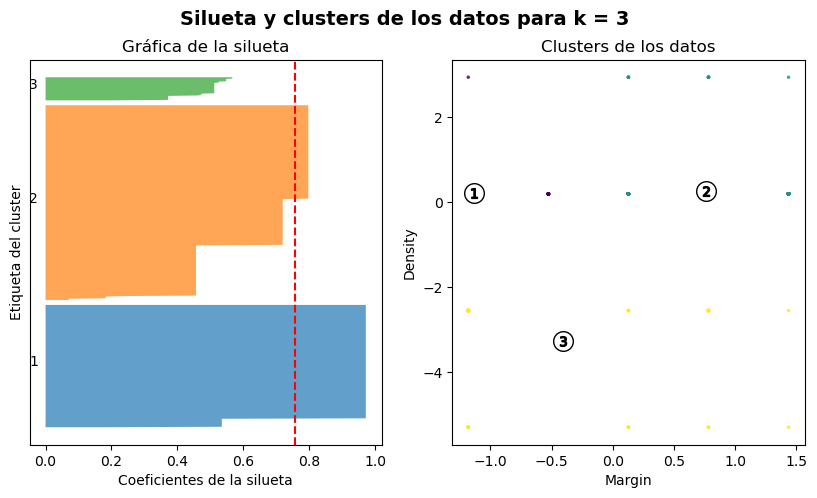

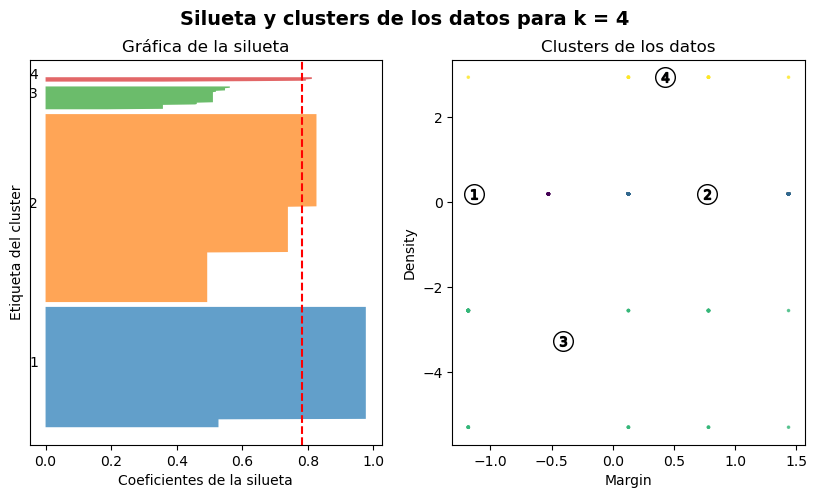

In [13]:
k_values = [2, 3, 4]

for k in k_values: 
    fig, (ax1, ax2) = plt.subplots(1, 2) # Creamos un sublot con una fila y 2 columnas
    fig.set_size_inches(10, 5)
    plt.suptitle(("Silueta y clusters de los datos para k = %d" %k), fontsize=14, fontweight='bold')
    
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
        
    # Primera gráfica de las siluetas
    ax1.set_yticks([]) 
    ax1.set_title("Gráfica de la silueta")
    ax1.set_xlabel("Coeficientes de la silueta")
    ax1.set_ylabel("Etiqueta del cluster")

    silhouette_avg = silhouette_score(X, labels)
    sample_silhouette_values = silhouette_samples(X, labels) #Calculamos los valores de la silueta individual
    print("Para k=", k, ", el valor medio de la silueta es:", silhouette_avg.round(4))

    # Representamos los valores de la silueta
    y_lower = 10

    for i in range(k):
        iter_cluster_silhouette_values = sample_silhouette_values[labels == i]    

        iter_cluster_silhouette_values.sort()
        
        size_cluster_i = iter_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, iter_cluster_silhouette_values, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1)) # Enumeramos el cluster

        y_lower = y_upper + 10 # Reiniciamos el valor para representar la silueta en la siguiente iteracion del bucle
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # Representamos el valor medio de las siluetas
    
    # Segunda gráfica de los clusters
    ax2.set_title("Clusters de los datos")
    ax2.set_xlabel("Margin")
    ax2.set_ylabel("Density")
        
    # Representamos el cluster
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=10, alpha=0.7,c=labels)
     
    # Calculamos los centroides, los marcamos con un círculo blanco y los enumeramos
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % (i+1), s=50, edgecolor='k')      

plt.show()

VARIABLES PCA

In [14]:
# Crear el DataFrame directamente desde la matriz datos_PCA
data_pca = pd.DataFrame(datos_PCA, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
data_pca.drop(columns=['PC5'], inplace=True)

Con todas las varialbes:

In [15]:
X = np.array(data_pca)

k_values = [2, 3, 4]

for k in k_values:    
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    
    silhouette_avg = silhouette_score(X, labels)
    sample_silhouette_values = silhouette_samples(X, labels) # Calculamos los valores de la silueta individual
    print("Para k =", k, ", el valor medio de la silueta es:", silhouette_avg.round(4))

c:\Users\Noemi\anaconda3\envs\uni\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Para k = 2 , el valor medio de la silueta es: 0.4175


c:\Users\Noemi\anaconda3\envs\uni\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Para k = 3 , el valor medio de la silueta es: 0.4433


c:\Users\Noemi\anaconda3\envs\uni\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Para k = 4 , el valor medio de la silueta es: 0.399


Con las dos mejores:

c:\Users\Noemi\anaconda3\envs\uni\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Para k= 2 , el valor medio de la silueta es: 0.6967


c:\Users\Noemi\anaconda3\envs\uni\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Para k= 3 , el valor medio de la silueta es: 0.4947


c:\Users\Noemi\anaconda3\envs\uni\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


Para k= 4 , el valor medio de la silueta es: 0.4448


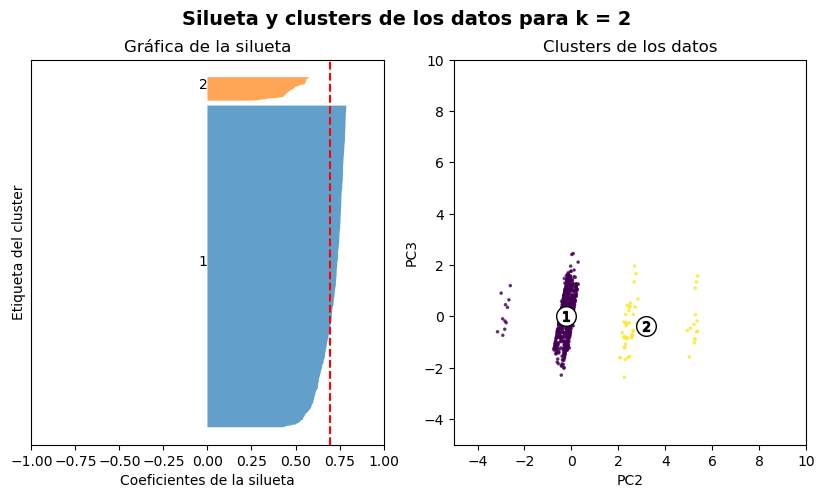

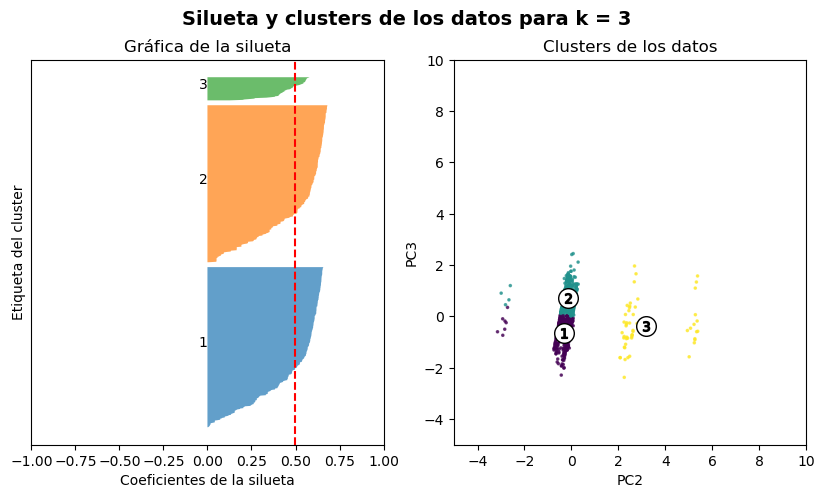

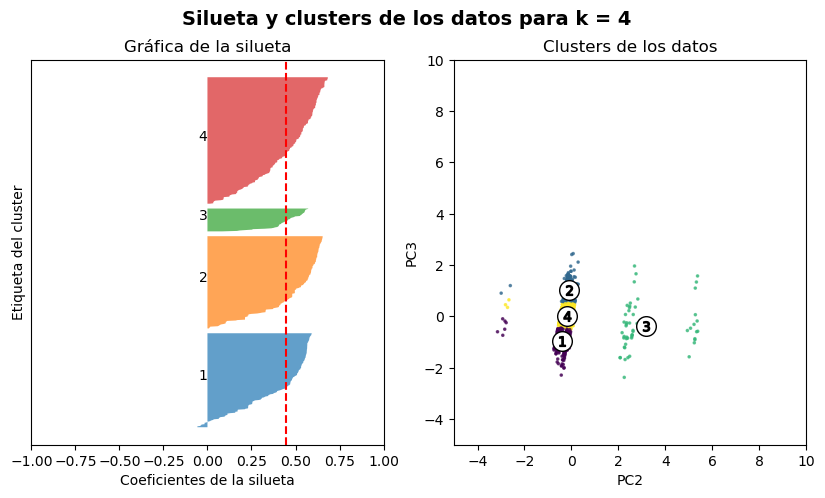

In [16]:
data=data_pca.iloc[:,1:3] #Componentes PC2 y PC3
X=np.array(data)


k_values = [2, 3, 4]

for k in k_values: 
    fig, (ax1, ax2) = plt.subplots(1, 2) # Creamos un sublot con una fila y 2 columnas
    fig.set_size_inches(10, 5)
    plt.suptitle(("Silueta y clusters de los datos para k = %d" %k), fontsize=14, fontweight='bold')
    
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
        
    # Primera gráfica de las siluetas
    ax1.set_yticks([]) 
    ax1.set_xlim([-1, 1])
    ax1.set_title("Gráfica de la silueta")
    ax1.set_xlabel("Coeficientes de la silueta")
    ax1.set_ylabel("Etiqueta del cluster")

    silhouette_avg = silhouette_score(X, labels)
    sample_silhouette_values = silhouette_samples(X, labels) #Calculamos los valores de la silueta individual
    print("Para k=", k, ", el valor medio de la silueta es:", silhouette_avg.round(4))

    # Representamos los valores de la silueta
    y_lower = 10

    for i in range(k):
        iter_cluster_silhouette_values = sample_silhouette_values[labels == i]    

        iter_cluster_silhouette_values.sort()
        
        size_cluster_i = iter_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, iter_cluster_silhouette_values, alpha=0.7)
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i+1)) # Enumeramos el cluster

        y_lower = y_upper + 10 # Reiniciamos el valor para representar la silueta en la siguiente iteracion del bucle
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # Representamos el valor medio de las siluetas
    
    # Segunda gráfica de los clusters
    ax2.set_title("Clusters de los datos")
    ax2.set_xlabel("PC2")
    ax2.set_ylabel("PC3")
    ax2.set_ylim([-5, 10])
    ax2.set_xlim([-5, 10])
        
    # Representamos el cluster
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=10, alpha=0.7,c=labels)
     
    # Calculamos los centroides, los marcamos con un círculo blanco y los enumeramos
    centers = kmeans.cluster_centers_
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o', c="white", s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % (i+1), s=50, edgecolor='k')      

plt.show()

## COMPARACIÓN DE LOS RESULTADOS

A la vista de los resultados, la mejor opción para agrupar los casos de la base de datos es realizar un agrupamiento KMeans con las variables originales. En concreto las variables para hacer el agrupamiento son Margin y Density con un valor de silueta de 0.84